# How are trading volume and volatility related for energy stocks?

## Introduction

**Business Context.** You are an analyst at a large mutual fund focused on natural resource stock investments. Natural resources are vital for a variety of industries in our economy. Recently, your division has taken interest in the following stocks:

1. Dominion Energy Inc.
2. Exelon Corp.
3. NextEra Energy Inc.
4. Southern Co.
5. Duke Energy Corp.

These stocks are all part of the energy sector, an important but volatile sector of the stock market. (A stock is considered volatile if its price exhibits large percentage changes day-to-day.) While high volatility increases the chance of great gains, it also makes it more likely to incur large losses, so risk must be managed carefully when investing in high-volatility stocks.

Because your firm is quite large, there must be enough trading volume (average amount of shares transacted per day) so that it can easily transact in these stocks. Otherwise, this effect compounded with the stocks' naturally high volatility could make these too risky for the mutual fund to invest in. A stock with higher trading volume is easier to buy or sell quickly, which is extremely important in a volatile market.

**Business Problem.** Given that both low trading volume and high volatility present risks to your investments, your team lead asks you to investigate the following: **"How is the volatility of energy stocks related to their average daily trading volume?"**

**Analytical Context.** The data you've been given comprises price and trading volume data for the above stocks. This case begins with a brief overview of this data, after which you will: (1) perform some basic feature engineering; (2) calculate and interpret relevant summary statistics; and (3) inspect the relationship between volatility and trading volume.

## Looking at the data

We have CSV files that include data for each of the following stocks:

1. Dominion Energy Inc. (Stock Symbol: `D`)
2. Exelon Corp. (Stock Symbol: `EXC`)
3. NextEra Energy Inc. (Stock Symbol: `NEE`)
4. Southern Co. (Stock Symbol: `SO`)
5. Duke Energy Corp. (Stock Symbol: `DUK`)

The available data for each stock includes:

1. **Date:** The day of the year
2. **Open:** The stock opening price of the day
3. **High:** The highest observed stock price of the day
4. **Low:** The lowest observed stock price of the day
5. **Close:** The stock closing price of the day
6. **Volume:** The volume of the stock traded over the day

To get a better sense of the available data, let's first take a look at just the data for Dominion Energy, listed on the New York Stock Exchange under the symbol `D`. These are the first 10 rows of our dataset:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Date</th>
    <th class="tg-0lax">Open</th>
    <th class="tg-0lax">High</th>
    <th class="tg-0lax">Low</th>
    <th class="tg-0lax">Close</th>
    <th class="tg-0lax">Volume</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">2014-07-01</td>
    <td class="tg-0lax">63.406</td>
    <td class="tg-0lax">63.486</td>
    <td class="tg-0lax">62.618</td>
    <td class="tg-0lax">63.077</td>
    <td class="tg-0lax">3626031</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-02</td>
    <td class="tg-0lax">62.929</td>
    <td class="tg-0lax">62.935</td>
    <td class="tg-0lax">61.403</td>
    <td class="tg-0lax">61.73</td>
    <td class="tg-0lax">4079097</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-03</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">60.303</td>
    <td class="tg-0lax">60.863</td>
    <td class="tg-0lax">2937489</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-07</td>
    <td class="tg-0lax">60.718</td>
    <td class="tg-0lax">61.43</td>
    <td class="tg-0lax">60.611</td>
    <td class="tg-0lax">61.038</td>
    <td class="tg-0lax">3122145</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-08</td>
    <td class="tg-0lax">60.931</td>
    <td class="tg-0lax">61.348</td>
    <td class="tg-0lax">60.88</td>
    <td class="tg-0lax">61.296</td>
    <td class="tg-0lax">3048285</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-09</td>
    <td class="tg-0lax">61.385</td>
    <td class="tg-0lax">61.501</td>
    <td class="tg-0lax">60.897</td>
    <td class="tg-0lax">61.34</td>
    <td class="tg-0lax">1948182</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-10</td>
    <td class="tg-0lax">61.26</td>
    <td class="tg-0lax">62.049</td>
    <td class="tg-0lax">61.163</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">2471888</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-11</td>
    <td class="tg-0lax">61.871</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">61.535</td>
    <td class="tg-0lax">61.607</td>
    <td class="tg-0lax">1418862</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-14</td>
    <td class="tg-0lax">61.802</td>
    <td class="tg-0lax">61.827</td>
    <td class="tg-0lax">61.057</td>
    <td class="tg-0lax">61.075</td>
    <td class="tg-0lax">1810671</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-15</td>
    <td class="tg-0lax">61.028</td>
    <td class="tg-0lax">61.696</td>
    <td class="tg-0lax">60.994</td>
    <td class="tg-0lax">61.625</td>
    <td class="tg-0lax">2714819</td>
  </tr>
</tbody>
</table>


## Creating additional variables relevant to stock volatility

Sometimes we don't have all the variables we need for our analysis out of the box, but we can use the existing ones to create new variables that are more relevant. (In most practical situations, you will need to do at least some of this.) Let's first add a new column with the name of the symbol:
   
    
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Date</th>
    <th class="tg-0lax">Open</th>
    <th class="tg-0lax">High</th>
    <th class="tg-0lax">Low</th>
    <th class="tg-0lax">Close</th>
    <th class="tg-0lax">Volume</th>
    <th class="tg-0lax">Symbol</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">2014-07-01</td>
    <td class="tg-0lax">63.406</td>
    <td class="tg-0lax">63.486</td>
    <td class="tg-0lax">62.618</td>
    <td class="tg-0lax">63.077</td>
    <td class="tg-0lax">3626031</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-02</td>
    <td class="tg-0lax">62.929</td>
    <td class="tg-0lax">62.935</td>
    <td class="tg-0lax">61.403</td>
    <td class="tg-0lax">61.73</td>
    <td class="tg-0lax">4079097</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-03</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">60.303</td>
    <td class="tg-0lax">60.863</td>
    <td class="tg-0lax">2937489</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-07</td>
    <td class="tg-0lax">60.718</td>
    <td class="tg-0lax">61.43</td>
    <td class="tg-0lax">60.611</td>
    <td class="tg-0lax">61.038</td>
    <td class="tg-0lax">3122145</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-08</td>
    <td class="tg-0lax">60.931</td>
    <td class="tg-0lax">61.348</td>
    <td class="tg-0lax">60.88</td>
    <td class="tg-0lax">61.296</td>
    <td class="tg-0lax">3048285</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-09</td>
    <td class="tg-0lax">61.385</td>
    <td class="tg-0lax">61.501</td>
    <td class="tg-0lax">60.897</td>
    <td class="tg-0lax">61.34</td>
    <td class="tg-0lax">1948182</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-10</td>
    <td class="tg-0lax">61.26</td>
    <td class="tg-0lax">62.049</td>
    <td class="tg-0lax">61.163</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">2471888</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-11</td>
    <td class="tg-0lax">61.871</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">61.535</td>
    <td class="tg-0lax">61.607</td>
    <td class="tg-0lax">1418862</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-14</td>
    <td class="tg-0lax">61.802</td>
    <td class="tg-0lax">61.827</td>
    <td class="tg-0lax">61.057</td>
    <td class="tg-0lax">61.075</td>
    <td class="tg-0lax">1810671</td>
    <td class="tg-0lax">D</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-15</td>
    <td class="tg-0lax">61.028</td>
    <td class="tg-0lax">61.696</td>
    <td class="tg-0lax">60.994</td>
    <td class="tg-0lax">61.625</td>
    <td class="tg-0lax">2714819</td>
    <td class="tg-0lax">D</td>
  </tr>
</tbody>
</table>
<br>

Since we're working only with Stock `D` for now, the symbol is `D` for all the rows.

There's a variable `Volume` that is a bit difficult to read, because its numbers are very large. What if we create a new variable, `Volume_Millions`, to make working with it easier? This new variable will have exactly the same data, but expressed in millions of shares (not units of shares). This means that its formula will be:

$$
Volume\_Millions = \frac{Volume}{1,000,000}
$$

And here it is:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Date</th>
    <th class="tg-0lax">Open</th>
    <th class="tg-0lax">High</th>
    <th class="tg-0lax">Low</th>
    <th class="tg-0lax">Close</th>
    <th class="tg-0lax">Volume</th>
    <th class="tg-0lax">Symbol</th>
    <th class="tg-0lax">Volume_Millions</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">2014-07-01</td>
    <td class="tg-0lax">63.406</td>
    <td class="tg-0lax">63.486</td>
    <td class="tg-0lax">62.618</td>
    <td class="tg-0lax">63.077</td>
    <td class="tg-0lax">3626031</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">3.626031</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-02</td>
    <td class="tg-0lax">62.929</td>
    <td class="tg-0lax">62.935</td>
    <td class="tg-0lax">61.403</td>
    <td class="tg-0lax">61.73</td>
    <td class="tg-0lax">4079097</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">4.079097</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-03</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">60.303</td>
    <td class="tg-0lax">60.863</td>
    <td class="tg-0lax">2937489</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">2.937489</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-07</td>
    <td class="tg-0lax">60.718</td>
    <td class="tg-0lax">61.43</td>
    <td class="tg-0lax">60.611</td>
    <td class="tg-0lax">61.038</td>
    <td class="tg-0lax">3122145</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">3.122145</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-08</td>
    <td class="tg-0lax">60.931</td>
    <td class="tg-0lax">61.348</td>
    <td class="tg-0lax">60.88</td>
    <td class="tg-0lax">61.296</td>
    <td class="tg-0lax">3048285</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">3.048285</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-09</td>
    <td class="tg-0lax">61.385</td>
    <td class="tg-0lax">61.501</td>
    <td class="tg-0lax">60.897</td>
    <td class="tg-0lax">61.34</td>
    <td class="tg-0lax">1948182</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">1.948182</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-10</td>
    <td class="tg-0lax">61.26</td>
    <td class="tg-0lax">62.049</td>
    <td class="tg-0lax">61.163</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">2471888</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">2.471888</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-11</td>
    <td class="tg-0lax">61.871</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">61.535</td>
    <td class="tg-0lax">61.607</td>
    <td class="tg-0lax">1418862</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">1.418862</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-14</td>
    <td class="tg-0lax">61.802</td>
    <td class="tg-0lax">61.827</td>
    <td class="tg-0lax">61.057</td>
    <td class="tg-0lax">61.075</td>
    <td class="tg-0lax">1810671</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">1.810671</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-15</td>
    <td class="tg-0lax">61.028</td>
    <td class="tg-0lax">61.696</td>
    <td class="tg-0lax">60.994</td>
    <td class="tg-0lax">61.625</td>
    <td class="tg-0lax">2714819</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">2.714819</td>
  </tr>
</tbody>
</table>

Moving forward, we need to have a feature in our DataFrame that is related to volatility. Because this currently does not exist, we must create it from the already available features. Recall that volatility is a measure of the variability of daily returns over a period of time, so let's create a feature for daily returns.

Daily returns are defined as the percentage gain or loss of a stock when comparing today's close price to the previous day's close price. Therefore:

$$
Return = \frac{Close_t}{Close_{t-1}} - 1
$$

where $t$ is an index of the days. Notice that we subtract 1 from the fraction to make this a rate of increase/decrease. That way, for instance, in the case where $Close_t$ and $Close_{t-1}$ are equal (no change), then $Return$ would be

$$\begin{aligned} Return &= 1 - 1 \\ &= 0 \end{aligned}$$


### Exercise 1

Imagine a day in which the price of the shares at the close was lower than at the previous day's close. Which of the following will be true?

<ul>
A. $Return = 0$<br>
B. $Return > 0$<br>
C. $Return < 0$<br>
D. $Return = 1$<br>
</ul>

**Answer.** C. Return < 0

Since the fraction term in the definition of Return will be less than one, Return will be less than 0; that is, there will be a negative return.

-------

We can create a new column `Close_Previous` to help us remember the closing price of the previous day ($Close_{t-1}$) and another one `Return` that corresponds to $Return$. Here is our updated DataFrame:


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Date</th>
    <th class="tg-0lax">Open</th>
    <th class="tg-0lax">High</th>
    <th class="tg-0lax">Low</th>
    <th class="tg-0lax">Close</th>
    <th class="tg-0lax">Volume</th>
    <th class="tg-0lax">Symbol</th>
    <th class="tg-0lax">Volume_Millions</th>
    <th class="tg-0lax">Close_Previous</th>
    <th class="tg-0lax">Return</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0lax">2014-07-01</td>
    <td class="tg-0lax">63.406</td>
    <td class="tg-0lax">63.486</td>
    <td class="tg-0lax">62.618</td>
    <td class="tg-0lax">63.077</td>
    <td class="tg-0lax">3626031</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">3.626031</td>
    <td class="tg-0lax">NaN</td>
    <td class="tg-0lax">NaN</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-02</td>
    <td class="tg-0lax">62.929</td>
    <td class="tg-0lax">62.935</td>
    <td class="tg-0lax">61.403</td>
    <td class="tg-0lax">61.73</td>
    <td class="tg-0lax">4079097</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">4.079097</td>
    <td class="tg-0lax">63.077</td>
    <td class="tg-0lax">-0.021355</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-03</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">61.394</td>
    <td class="tg-0lax">60.303</td>
    <td class="tg-0lax">60.863</td>
    <td class="tg-0lax">2937489</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">2.937489</td>
    <td class="tg-0lax">61.73</td>
    <td class="tg-0lax">-0.014045</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-07</td>
    <td class="tg-0lax">60.718</td>
    <td class="tg-0lax">61.43</td>
    <td class="tg-0lax">60.611</td>
    <td class="tg-0lax">61.038</td>
    <td class="tg-0lax">3122145</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">3.122145</td>
    <td class="tg-0lax">60.863</td>
    <td class="tg-0lax">0.002875</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-08</td>
    <td class="tg-0lax">60.931</td>
    <td class="tg-0lax">61.348</td>
    <td class="tg-0lax">60.88</td>
    <td class="tg-0lax">61.296</td>
    <td class="tg-0lax">3048285</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">3.048285</td>
    <td class="tg-0lax">61.038</td>
    <td class="tg-0lax">0.004227</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-09</td>
    <td class="tg-0lax">61.385</td>
    <td class="tg-0lax">61.501</td>
    <td class="tg-0lax">60.897</td>
    <td class="tg-0lax">61.34</td>
    <td class="tg-0lax">1948182</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">1.948182</td>
    <td class="tg-0lax">61.296</td>
    <td class="tg-0lax">0.000718</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-10</td>
    <td class="tg-0lax">61.26</td>
    <td class="tg-0lax">62.049</td>
    <td class="tg-0lax">61.163</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">2471888</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">2.471888</td>
    <td class="tg-0lax">61.34</td>
    <td class="tg-0lax">0.011265</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-11</td>
    <td class="tg-0lax">61.871</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">61.535</td>
    <td class="tg-0lax">61.607</td>
    <td class="tg-0lax">1418862</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">1.418862</td>
    <td class="tg-0lax">62.031</td>
    <td class="tg-0lax">-0.006835</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-14</td>
    <td class="tg-0lax">61.802</td>
    <td class="tg-0lax">61.827</td>
    <td class="tg-0lax">61.057</td>
    <td class="tg-0lax">61.075</td>
    <td class="tg-0lax">1810671</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">1.810671</td>
    <td class="tg-0lax">61.607</td>
    <td class="tg-0lax">-0.008635</td>
  </tr>
  <tr>
    <td class="tg-0lax">2014-07-15</td>
    <td class="tg-0lax">61.028</td>
    <td class="tg-0lax">61.696</td>
    <td class="tg-0lax">60.994</td>
    <td class="tg-0lax">61.625</td>
    <td class="tg-0lax">2714819</td>
    <td class="tg-0lax">D</td>
    <td class="tg-0lax">2.714819</td>
    <td class="tg-0lax">61.075</td>
    <td class="tg-0lax">0.009005</td>
  </tr>
</tbody>
</table>

You can verify that, for the 8 of July, for instance, the closing price was 61.296 and the closing price of the previous day was 61.038, which means that:

$$\begin{aligned}
Return_{Jul\ 8,\ 2014} &= \frac{61.296}{61.038} - 1 \\
&= 0.004226875
\end{aligned}$$


Let's create another quantity to measure our volatility. Let's call it `VolStat`. This quantity takes the range of the price of each day (`High` - `Low`) rather than the difference between today's closing price and yesterday's closing price. The formula is:

$$
VolStat = \frac{High_t - Low_t}{Open_t}
$$

This metric captures movements in the middle of each day, rather than just movements between days. We divide by $Open_t$ to normalize the result so that we get a number that is more comparable across days. The DataFrame with this new feature looks like this:


<table>
<thead>
  <tr>
    <th>Date</th>
    <th>Open</th>
    <th>High</th>
    <th>Low</th>
    <th>Close</th>
    <th>Volume</th>
    <th>Symbol</th>
    <th>Volume_Millions</th>
    <th>Close_Previous</th>
    <th>Return</th>
    <th>VolStat</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>2014-07-01</td>
    <td>63.406</td>
    <td>63.486</td>
    <td>62.618</td>
    <td>63.077</td>
    <td>3626031</td>
    <td>D</td>
    <td>3.626031</td>
    <td>NaN</td>
    <td>NaN</td>
    <td>0.01369</td>
  </tr>
  <tr>
    <td>2014-07-02</td>
    <td>62.929</td>
    <td>62.935</td>
    <td>61.403</td>
    <td>61.73</td>
    <td>4079097</td>
    <td>D</td>
    <td>4.079097</td>
    <td>63.077</td>
    <td>-0.021355</td>
    <td>0.024345</td>
  </tr>
  <tr>
    <td>2014-07-03</td>
    <td>61.394</td>
    <td>61.394</td>
    <td>60.303</td>
    <td>60.863</td>
    <td>2937489</td>
    <td>D</td>
    <td>2.937489</td>
    <td>61.73</td>
    <td>-0.014045</td>
    <td>0.01777</td>
  </tr>
  <tr>
    <td>2014-07-07</td>
    <td>60.718</td>
    <td>61.43</td>
    <td>60.611</td>
    <td>61.038</td>
    <td>3122145</td>
    <td>D</td>
    <td>3.122145</td>
    <td>60.863</td>
    <td>0.002875</td>
    <td>0.013489</td>
  </tr>
  <tr>
    <td>2014-07-08</td>
    <td>60.931</td>
    <td>61.348</td>
    <td>60.88</td>
    <td>61.296</td>
    <td>3048285</td>
    <td>D</td>
    <td>3.048285</td>
    <td>61.038</td>
    <td>0.004227</td>
    <td>0.007681</td>
  </tr>
  <tr>
    <td>2014-07-09</td>
    <td>61.385</td>
    <td>61.501</td>
    <td>60.897</td>
    <td>61.34</td>
    <td>1948182</td>
    <td>D</td>
    <td>1.948182</td>
    <td>61.296</td>
    <td>0.000718</td>
    <td>0.00984</td>
  </tr>
  <tr>
    <td>2014-07-10</td>
    <td>61.26</td>
    <td>62.049</td>
    <td>61.163</td>
    <td>62.031</td>
    <td>2471888</td>
    <td>D</td>
    <td>2.471888</td>
    <td>61.34</td>
    <td>0.011265</td>
    <td>0.014463</td>
  </tr>
  <tr>
    <td>2014-07-11</td>
    <td>61.871</td>
    <td>62.031</td>
    <td>61.535</td>
    <td>61.607</td>
    <td>1418862</td>
    <td>D</td>
    <td>1.418862</td>
    <td>62.031</td>
    <td>-0.006835</td>
    <td>0.008017</td>
  </tr>
  <tr>
    <td>2014-07-14</td>
    <td>61.802</td>
    <td>61.827</td>
    <td>61.057</td>
    <td>61.075</td>
    <td>1810671</td>
    <td>D</td>
    <td>1.810671</td>
    <td>61.607</td>
    <td>-0.008635</td>
    <td>0.012459</td>
  </tr>
  <tr>
    <td>2014-07-15</td>
    <td>61.028</td>
    <td>61.696</td>
    <td>60.994</td>
    <td>61.625</td>
    <td>2714819</td>
    <td>D</td>
    <td>2.714819</td>
    <td>61.075</td>
    <td>0.009005</td>
    <td>0.011503</td>
  </tr>
</tbody>
</table>

We're all set - let's start exploring our data!

## Learning about the data distribution through summary statistics

Let's imagine a hypothetical situation - suppose you have a list of ages taken from a survey you conducted among your friends. The ages are:

```
21, 30, 35, 40, 41, 45, 44, 44, 48, 43, 70
```

If you needed to summarize this set of numbers, you could group them in subsets (by tens for example; e.g. 20s, 30s, 40s, etc.) and count the number of numbers within each subset. In this example, the resulting **frequency table** would be:

| Group | Number of people |
| ------| -----------------|
20-29 | 1 |
30-39 | 2 |
40-49 | 7 |
50-59 | 0 |
60-69 | 0 |
70-79 | 1 |

So, instead of reciting the ages of your friends one-by-one every time someone asks you about them, you can simply report the frequency table and say "most of my friends are between 40 and 49 years old". When you make claims like this, you are describing the **distribution** of the available data across the subsets you have defined.

If you plot a frequency table in which the categories are intervals, you get something called a **histogram**:

!["Histogram of ages"](data/images/histogram_of_ages.png)

You can vary the width of the bins in a histogram to get a higher or lower resolution summary of your picture, depending on your needs. For instance, this is the same dataset, but summarized by a histogram in which each bar is only five years wide:

!["Histogram of ages"](data/images/histogram_of_ages_5_years.png)

The ideal bin width will depend on your particular needs. `pandas` provides you with sensible defaults, so most of the time you won't have to worry too much about it.

Now that we know what a distribution is and how to represent it graphically, let's plot the distribution of our `Volume_Millions` column:

!["Histogram of Volume_Millions"](data/images/histogram_of_volume_millions.png)

Let's interpret it. There are some important things that catch our eye as soon as we see the histogram:

* The variable ranges between ~1 and ~12 (recall these are millions of shares).
* On most days, the traded volume is higher than 1 million but lower than 4 million. Therefore, a "typical" day would be a day in which the number of traded shares is between those two numbers. It seems that there is non-trivial variability even in a typical day.
* There are very few days with traded volume higher than 6 million. It is very rare to see days with very high traded volumes (extreme values are called **outliers**).
* Since this distribution has a "tail" on the right side, we say it is "right-skewed".

### Exercise 2

Interpret the below histogram of `Open` for `D`.

!["Histogram of Open"](data/images/histogram_of_open.png)

**Answer.** A possible answer is below:

-The variable ranges between ~55 and ~85 USD.

-On most days, the Open price is between ~64 and ~77.

-Days with an Open price that is too low (less than ~60) or too high (more than ~77) are very rare.

-This distribution looks a bit skewed to the right.

-------

While creating frequency tables and plotting them is useful, we sometimes want to have an even more summarized view of our data. For that, we compute **summary statistics**. You can think of your histogram as a summary of your raw data, and your summary statistics as a summary of the shape of your histogram.

Probably the most straightforward statistics are the minimum and the maximum. You can plot them over your histogram to see them in context, like in this histogram of `Open`:

!["Histogram of Open with minimum and maximum"](data/images/histogram_of_open_min_max.png)

So the minimum value of `Open` is 57.77 and the maximum is 81.55.

### Exercise 3

The **range** of a variable is the number you get when you subtract the minimum value from the maximum value. It is useful to help you get an idea of all the possible values that your variable can take or has taken in a particular sample. What is the range of `Open` for the `D` stock?

**Answer.**  The range of Open is $81.55-57.77 = $23.78.

-------

As much as the minimum and the maximum give you important information about the shape of your distribution/histogram, they are often not enough. As an example of one thing they don't show, think of two histograms with exactly the same range, but one is symmetric and the other isn't. Only knowing the most extreme values doesn't allow you to observe the symmetry or asymmetry of your distribution.

That's why data practitioners make use of other summary statistics, one of which (probably the most famous) is the **arithmetic mean** (or simply the **mean**).

The formula for the mean is the following:

$$
\bar{X} = \displaystyle\frac{\displaystyle\sum_{i=1}^{n} a_i}{n}
$$

where $X$ is your variable (that is, the values in your data sample), $\bar{X}$ is the mean of your variable, $n$ is the number of data points in your data sample, and $a_i$ is the value of the $i$-th data point in your data sample.

If you're not familiar with [summation notation](https://en.wikipedia.org/wiki/Summation#Notation), here is an equivalent:

$$
\bar{X} = \frac{a_1 + a_2 + a_3 + ... + a_n}{n}
$$

So to compute the mean, you sum up all the values in your data sample and then divide the result by the number of data points in your data sample.

Let's visualize the mean of `Open` (the mean is the yellow line):

!["Histogram of Open with mean"](data/images/histogram_of_open_mean.png)

As you can see, the mean is at the middle of this histogram. Conceptually, the mean is a type of average that attempts to report the "center" of your distribution; i.e. the "center" of your histogram. If your data are mostly concentrated around the middle of the histogram, then the mean is a very good summary of the "typical value" of your dataset. If your data are not concentrated around the center, then your mean loses credibility as the typical value.

Another central tendency measure is the **median**. The median, just like the mean, reports an approximation of the center of the distribution. It is computed differently and it also behaves differently in certain situations, which is the reason why it is used alongside the mean.

Let's say you have a data sample called $X$. To calculate the median, you have to:

1. Sort $X$ from smallest to largest.
2. Pick the value that is right in the middle - that's your median.

If your data sample happens to have an even number of elements, then you'll find that there are *two* numbers in the middle of the ordered set, not just one. In that case, you add them and then divide the sum by 2. The result is your median.

Let's visualize the median. This is a plot of `Open` in which the *mean* is in yellow and the *median* is in green:

!["Histogram of Open with mean and median"](data/images/histogram_of_open_mean_median.png)

Since the median is exactly at the middle point in your dataset, 50% of your data points will be smaller than that value and 50% will be larger than that value.

### Exercise 4

Recall the distribution of the `Volume_Millions` column:

!["Histogram of Volume_Millions"](data/images/histogram_of_volume_millions.png)

Which of the following is true about this distribution?

<ul>
A. The mean and the median will coincide.<br>
B. The mean will be greater than the median.<br>
C. The mean will be less than the median.<br>
</ul>

**Answer.** The mean will be greater than the median. We can see that graphically:

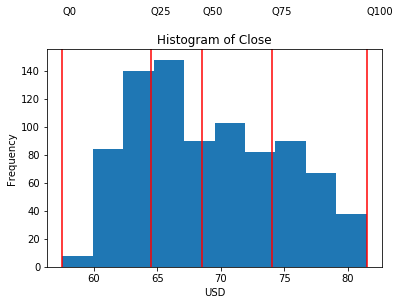

In general, if you have symmetric distributions, the mean and the median will be the same, or really close to each other. If you have a distribution that is skewed to the right like this one, the mean will be more to the right than the median; if you have a distribution that is skewed to the left, the mean will be more to the left than the median. You can use the mean and the median jointly to get a sense of the symmetry or asymmetry of your distribution.

Additionally, because of the way both statistics are calculated, the mean will be more sensitive to outliers than the median. That is, a single very large value (or very small, for that matter), will dramatically change the mean, while the median will remain “unfazed”. This property of the median, called robustness, is useful for a lot of applications.

-------

There are two additional summary statistics worth mentioning. The first is the [**mode**](https://en.wikipedia.org/wiki/Mode_(statistics)). The mode is simply the value that appears most often in your dataset. If there is one value that is the most frequent, the distribution is said to be *unimodal* (one mode), but if several values are very frequent (which makes the distribution look like a [Bactrian camel's back](https://en.wikipedia.org/wiki/Bactrian_camel)), then it is [**multimodal**](https://en.wikipedia.org/wiki/Multimodal_distribution).

The second one is the **quantile** function. This function gives you the $q$-th percentile of your dataset; i.e. the value such that $q$ percent of your dataset is less than that value. The median is a classical case of this, where $q = 50$. As another example, a cutoff of $q = 25$ means that 25\% of your data are below the resulting value.

### Exercise 5

This is the distribution of the `Close` column:

!["Histogram of Close"](data/images/histogram_of_close.png)

Try to imagine where the lines should be for these quantiles:

* $q=0$
* $q=25$
* $q=50$
* $q=75$
* $q=100$

If you can draw the histogram on paper, try drawing the vertical lines by hand and then take a photo and share it with the class.

**Answer.** This is the plot with the quantiles:

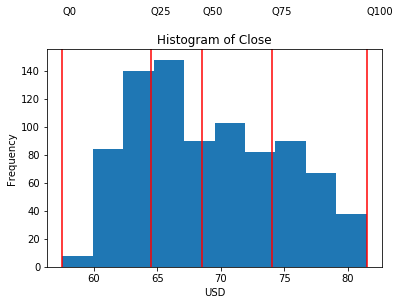

You’ll notice that q=0 is the same as the minimum, q=50 is the same as the median and q=100 is the same as the maximum.

The three inner quantiles are somewhat “squeezed” around the middle of the distribution; i.e. the quantiles are not evenly spaced along the horizontal axis. This is because most of the data points are clustered around the median.

-------

### Exercise 6

Let's visualize the relationship between the shape of a histogram and its summary statistics. Run the cell below and open the link that appears. Play around with the parameters and share with the class everything that you find interesting. Every time that you change the parameters, a distribution of random numbers is generated and its mean and quantiles are computed.

**Hint:** We suggest you try doing this as well:

1. Set both parameters all the way to the left. The resulting distribution is called a **uniform distribution**. What can you say about its summary statistics?
2. Set both parameters all the way to the right. Now what do you see?
3. Set one parameter all the way to the right and the other all the way to the left. What happens?

In [3]:
# Please run this cell TWICE
# If you need to stop the app, simply restart your kernel
import c1applet.c1applet as c1
c1app = c1.app
c1app.run_server(port='8050')

/opt/conda/lib/python3.8/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning: The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.
  func()


Dash app running on https://workspace.ds4a.com/user/horatioxu1122@gmail.com/proxy/8050/


## Analyzing each stock's volatility levels

Let's now work with the complete dataset. Now we have data for all five stocks in a single table. These are the summary statistics for the `VolStat` column for each stock:


<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Symbol</th>      <th>count</th>      <th>mean</th>      <th>std</th>      <th>min</th>      <th>25%</th>      <th>50%</th>      <th>75%</th>      <th>max</th>    </tr>    <tr>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>D</th>      <td>850.0</td>      <td>0.014364</td>      <td>0.006420</td>      <td>0.003636</td>      <td>0.009789</td>      <td>0.013084</td>      <td>0.017269</td>      <td>0.049232</td>    </tr>    <tr>      <th>DUK</th>      <td>850.0</td>      <td>0.014070</td>      <td>0.006368</td>      <td>0.003548</td>      <td>0.009649</td>      <td>0.012351</td>      <td>0.017350</td>      <td>0.054170</td>    </tr>    <tr>      <th>EXC</th>      <td>850.0</td>      <td>0.018529</td>      <td>0.008725</td>      <td>0.005390</td>      <td>0.012319</td>      <td>0.016744</td>      <td>0.022779</td>      <td>0.093240</td>    </tr>    <tr>      <th>NEE</th>      <td>850.0</td>      <td>0.014801</td>      <td>0.006672</td>      <td>0.004454</td>      <td>0.010192</td>      <td>0.013178</td>      <td>0.017617</td>      <td>0.056885</td>    </tr>    <tr>      <th>SO</th>      <td>850.0</td>      <td>0.013325</td>      <td>0.005952</td>      <td>0.002926</td>      <td>0.009068</td>      <td>0.012017</td>      <td>0.015934</td>      <td>0.047707</td>    </tr>  </tbody></table>

**Note:** The `std` column refers to the *standard deviation*. Don't worry about this one for now; we'll cover this concept in future cases.

One immediate observation of note is that the volatility level on any given day can vary widely. This is evident from the wide spread between the minimum and maximum ```VolStat``` levels seen here. For example, stock symbol `D` has a minimum ```VolStat``` value of 0.003636, while its maximum ```VolStat``` value is 0.049232. That's more than a 10x increase in the value of ```VolStat```!

### Exercise 7

What are some insights you can draw from the ```VolStat``` summary statistics in terms of volatility levels?

**Answer.** Symbol EXC seems to have higher volatility that the other stocks (compare its q = 50 and q = 75 values with those of the other stocks, for instance). Perhaps symbol EXC has a different business model or has had a turbulent business environment in recent years. Further analysis is needed to determine the actual cause of the higher volatility relative to the other energy sector stocks.

-------

## Labeling data points as high or low volatility

Now that we've determined that the volatility levels of each stock can vary widely, the next logical step is to group periods of high and low volatility so that we can then look at how volume differs between those time periods.

However, we don't currently have a column that identifies when volatility is high and when it is low. Therefore, we must create a new column called ```VolLevel``` using some volatility threshold. For example, we'd like to have a new column value determined by:

```python
if VolStat > threshold:
    VolLevel = 'HIGH'
else:
    VolLevel = 'LOW'
```

Here we will define low volatility levels by any ```VolStat``` below the 50th percentile (i.e. below the median). Each percentile value must be calculated by symbol to ensure that each symbol is individually analyzed.

This is a sample of our dataset with this added column:

<table>
<thead>
  <tr>
    <th>Date</th>
    <th>Open</th>
    <th>High</th>
    <th>Low</th>
    <th>Close</th>
    <th>Volume</th>
    <th>Symbol</th>
    <th>Close_Previous</th>
    <th>Return</th>
    <th>Volume_Millions</th>
    <th>VolStat</th>
    <th>threshold</th>
    <th>VolLevel</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>2014-07-01</td>
    <td>63.406</td>
    <td>63.486</td>
    <td>62.618</td>
    <td>63.077</td>
    <td>3626031</td>
    <td>D</td>
    <td>NaN</td>
    <td>NaN</td>
    <td>3.626031</td>
    <td>0.01369</td>
    <td>0.013084</td>
    <td>HIGH</td>
  </tr>
  <tr>
    <td>2014-07-02</td>
    <td>62.929</td>
    <td>62.935</td>
    <td>61.403</td>
    <td>61.73</td>
    <td>4079097</td>
    <td>D</td>
    <td>63.077</td>
    <td>-0.021355</td>
    <td>4.079097</td>
    <td>0.024345</td>
    <td>0.013084</td>
    <td>HIGH</td>
  </tr>
  <tr>
    <td>2014-07-03</td>
    <td>61.394</td>
    <td>61.394</td>
    <td>60.303</td>
    <td>60.863</td>
    <td>2937489</td>
    <td>D</td>
    <td>61.73</td>
    <td>-0.014045</td>
    <td>2.937489</td>
    <td>0.01777</td>
    <td>0.013084</td>
    <td>HIGH</td>
  </tr>
  <tr>
    <td>2014-07-07</td>
    <td>60.718</td>
    <td>61.43</td>
    <td>60.611</td>
    <td>61.038</td>
    <td>3122145</td>
    <td>D</td>
    <td>60.863</td>
    <td>0.002875</td>
    <td>3.122145</td>
    <td>0.013489</td>
    <td>0.013084</td>
    <td>HIGH</td>
  </tr>
  <tr>
    <td>2014-07-08</td>
    <td>60.931</td>
    <td>61.348</td>
    <td>60.88</td>
    <td>61.296</td>
    <td>3048285</td>
    <td>D</td>
    <td>61.038</td>
    <td>0.004227</td>
    <td>3.048285</td>
    <td>0.007681</td>
    <td>0.013084</td>
    <td>LOW</td>
  </tr>
  <tr>
    <td>2014-07-09</td>
    <td>61.385</td>
    <td>61.501</td>
    <td>60.897</td>
    <td>61.34</td>
    <td>1948182</td>
    <td>D</td>
    <td>61.296</td>
    <td>0.000718</td>
    <td>1.948182</td>
    <td>0.00984</td>
    <td>0.013084</td>
    <td>LOW</td>
  </tr>
  <tr>
    <td>2014-07-10</td>
    <td>61.26</td>
    <td>62.049</td>
    <td>61.163</td>
    <td>62.031</td>
    <td>2471888</td>
    <td>D</td>
    <td>61.34</td>
    <td>0.011265</td>
    <td>2.471888</td>
    <td>0.014463</td>
    <td>0.013084</td>
    <td>HIGH</td>
  </tr>
  <tr>
    <td>2014-07-11</td>
    <td>61.871</td>
    <td>62.031</td>
    <td>61.535</td>
    <td>61.607</td>
    <td>1418862</td>
    <td>D</td>
    <td>62.031</td>
    <td>-0.006835</td>
    <td>1.418862</td>
    <td>0.008017</td>
    <td>0.013084</td>
    <td>LOW</td>
  </tr>
  <tr>
    <td>2014-07-14</td>
    <td>61.802</td>
    <td>61.827</td>
    <td>61.057</td>
    <td>61.075</td>
    <td>1810671</td>
    <td>D</td>
    <td>61.607</td>
    <td>-0.008635</td>
    <td>1.810671</td>
    <td>0.012459</td>
    <td>0.013084</td>
    <td>LOW</td>
  </tr>
  <tr>
    <td>2014-07-15</td>
    <td>61.028</td>
    <td>61.696</td>
    <td>60.994</td>
    <td>61.625</td>
    <td>2714819</td>
    <td>D</td>
    <td>61.075</td>
    <td>0.009005</td>
    <td>2.714819</td>
    <td>0.011503</td>
    <td>0.013084</td>
    <td>LOW</td>
  </tr>
</tbody>
</table>

## Is daily trading volume affected by the level of volatility?

To explore the relationship between volatility level (`VolLevel`) and daily trading volume (`Volume_Millions`), let's group by `Symbol` and `VolLevel` and take a look at the average value of `Volume_Millions` for the high and low volatility groups:


<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Symbol</th>      <th>VolLevel</th>      <th>Volume_Millions (avg.)</th>    </tr>    <tr>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th rowspan="2" valign="top">D</th>      <th>HIGH</th>      <td>3.124387</td>    </tr>    <tr>      <th>LOW</th>      <td>2.377182</td>    </tr>    <tr>      <th rowspan="2" valign="top">DUK</th>      <th>HIGH</th>      <td>3.959825</td>    </tr>    <tr>      <th>LOW</th>      <td>2.804479</td>    </tr>    <tr>      <th rowspan="2" valign="top">EXC</th>      <th>HIGH</th>      <td>8.009471</td>    </tr>    <tr>      <th>LOW</th>      <td>5.369258</td>    </tr>    <tr>      <th rowspan="2" valign="top">NEE</th>      <th>HIGH</th>      <td>2.559527</td>    </tr>    <tr>      <th>LOW</th>      <td>1.763768</td>    </tr>    <tr>      <th rowspan="2" valign="top">SO</th>      <th>HIGH</th>      <td>6.422478</td>    </tr>    <tr>      <th>LOW</th>      <td>4.623356</td>    </tr>  </tbody></table>

### Exercise 8

What is a pattern you immediately notice regarding the volatility regimes?

**Answer.** Higher volatility days tend to have higher daily trading volume. The pattern is consistent across all five symbols, indicating that we’ve potentially found a relationship between volatility and trading volume.

-------

## Graphing volatility across time (optional)

We've now satisfactorily answered our original question. However, you don't need to just analyze data in tabular format. When doing data science, it is very important to analyze your data visually as well.

Below is a **time series plot** of the `VolStat` column for each stock symbol. A time series plot has the date/time on the $x$-axis, and the value of what you are looking at across time (in this case, `VolStat`) on the $y$-axis:

![Time series plot](data/images/time_series.png)

### Exercise 9 (optional)

What interesting patterns do you notice in the time series plot?

**Answer.** One possible answer is the following:

We notice that periods of high volatility tend to “clump” together; that is, periods of high volatility are not uniformly and randomly distributed across time, but tend to occur in highly concentrated bursts. This is an interesting insight that we could not gain from only looking at the data in tabular format.

There also seems to be some kind of cyclical movement within each year. This might be worth investigating further.

-------

As our data covers several years, it is also interesting to group the data by calendar month, ignoring the year component (e.g. averaging together all Januarys). This allows us to see if some points of the year, on average, are more susceptible to volatile trading patterns.

This is a plot of the mean `VolStat` by calendar month and stock symbol:

!["Plot of VolStat by calendar month](data/images/time_series_month.png)

### Exercise 10 (optional)

Identify:

* The month(s) that seem(s) to have the highest volatility
* The month(s) that seem(s) to have the lowest volatility
* Any general patterns that you notice over the whole year

**Answer.** We notice that July seems to be the month with the lowest volatility, while February and December have the highest. Overall, there seems to be an increase in volatility in the September - March period, and a decrease in April to August.

-------

## Conclusions

Having completed the analysis of the energy sector stock data, we have identified a number of interesting patterns relating volatility to trading volume. Specifically, we found that periods of high volatility also exhibit very high volume. This trend is consistent across all symbols.

We also saw that each stock exhibited "volatility clustering" - periods of high volatility tend to be clumped together. Each of the stocks experienced high volatility at relatively similar times which suggests some broader market factor may be affecting the energy sector.

## Attribution

"Huge Stock Market Dataset", No. 10, 2017, Boris Marjanovic, Public Domain. https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

"Dash styleguide", Chris P., [MIT License](https://blog.codepen.io/documentation/terms-of-service/), https://codepen.io/chriddyp/pen/bWLwgP